# Laugh test 6: Cryosuction processes in soil
This notebook plots SUMMA simulations for the test case defined in in Mizoguchi (1990, in Japanese, translated in Hansson et al., 2004).

## Expectations
The simulations should resemble data from Mizoguchi's laboratory experiments.

## Meta data

| Data  | Value  |
|:---|:---|
| Model name| Structure for Unifying Multiple Modelling Alternatives (SUMMA) |
| Model version  | See attributes in output .nc file |
| Model reference | Clark et al. (2015a,b) |
| Model runs by | R. Zolfaghari |
| Notebook code by | W. Knoben, A. Bennett |
    
## Reference(s)
Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Rasmussen, R. M. (2015a). A unified approach for process-based hydrologic modeling: 1. Modeling concept. Water Resources Research, 51(4), 2498–2514. https://doi.org/10.1002/2015WR017198

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Marks, D. G. (2015b). A unified approach for process-based hydrologic modeling: 2. Model implementation and case studies. Water Resources Research, 51, 2515–2542. https://doi.org/10.1002/2015WR017200

Hansson, K., Šimůnek, J., Mizoguchi, M., Lundin, L. C., & Van Genuchten, M. T. (2004). Water flow and heat transport in frozen soil. Vadose Zone Journal, 3(2), 693-704.

Mizoguchi, M. 1990. Water, heat and salt transport in freezing soil. Ph.D. thesis. (In Japanese.) University of Tokyo.

In [10]:
# modules
from pathlib import Path
from matplotlib.ticker import MultipleLocator
import xarray as xr # note, also needs netcdf4 library installed
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Specify the data locations relative to the notebook
sim_path = Path("./output")
sim_file = '/SUMMA/Laugh-Tests/test_cases/output/mizoguchi1990/mizoguchi1990_G1-1_timestep.nc'
obs_path = Path('./evaluationData')
obs_file = 'mizoguchiLabData.txt'

In [12]:
# Specify plotting dimensions
timesteps = [720,1440,3000]

In [13]:
# Load the data
ds = xr.open_dataset( sim_path / sim_file ).isel(hru=0, gru=0).load()
ld = np.loadtxt(fname = (obs_path / obs_file))

In [14]:
# Remove the mising data layers
ds = ds.where(ds['mLayerDepth'] != -9999, drop=True)

In [15]:
# The depths in the observations are in [mm], whereas those in summa are in [m]
# Depths in observations are also given as negative values, whereas SUMMA's are positive
# Convert observations data depths to be consistent with SUMMA
ld[:,0] = ld[:,0] / (-1000)

In [16]:
# Ensure that we can actually read the figure labels
font = {'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [17]:
# Auxiliary function so we don't need to pollute the plotting code block
# Sets various axis properties that are constant for all three subplots
def set_axes_and_text(ix,ttl):

    # Flip y-axis
    ax[ix].invert_yaxis()
    
    # Axis limits
    ax[ix].set_xlim(0,0.5)
    
    # Tick spacing, placement, size
    ax[ix].set_yticks(np.arange(0,0.201,0.05)) # cheeky, but otherwise the 0.2 doesn't show up
    ax[ix].yaxis.set_minor_locator(MultipleLocator(0.01))
    ax[ix].xaxis.set_minor_locator(MultipleLocator(0.01))
    ax[ix].yaxis.set_ticks_position('both')
    ax[ix].xaxis.set_ticks_position('both')
    ax[ix].tick_params(which='major', length=12, direction='in')
    ax[ix].tick_params(which='minor', length=6, direction='in')
   
    # Labels
    ax[ix].set_xlabel('Total volumetric water [-]'); 
    if ix == 0: ax[ix].set_ylabel('Depth [m]');
    ax[ix].legend();
    ax[ix].set_title(ttl);
    
    return

ValueError: x and y must have same first dimension, but have shapes (20,) and (121, 20)

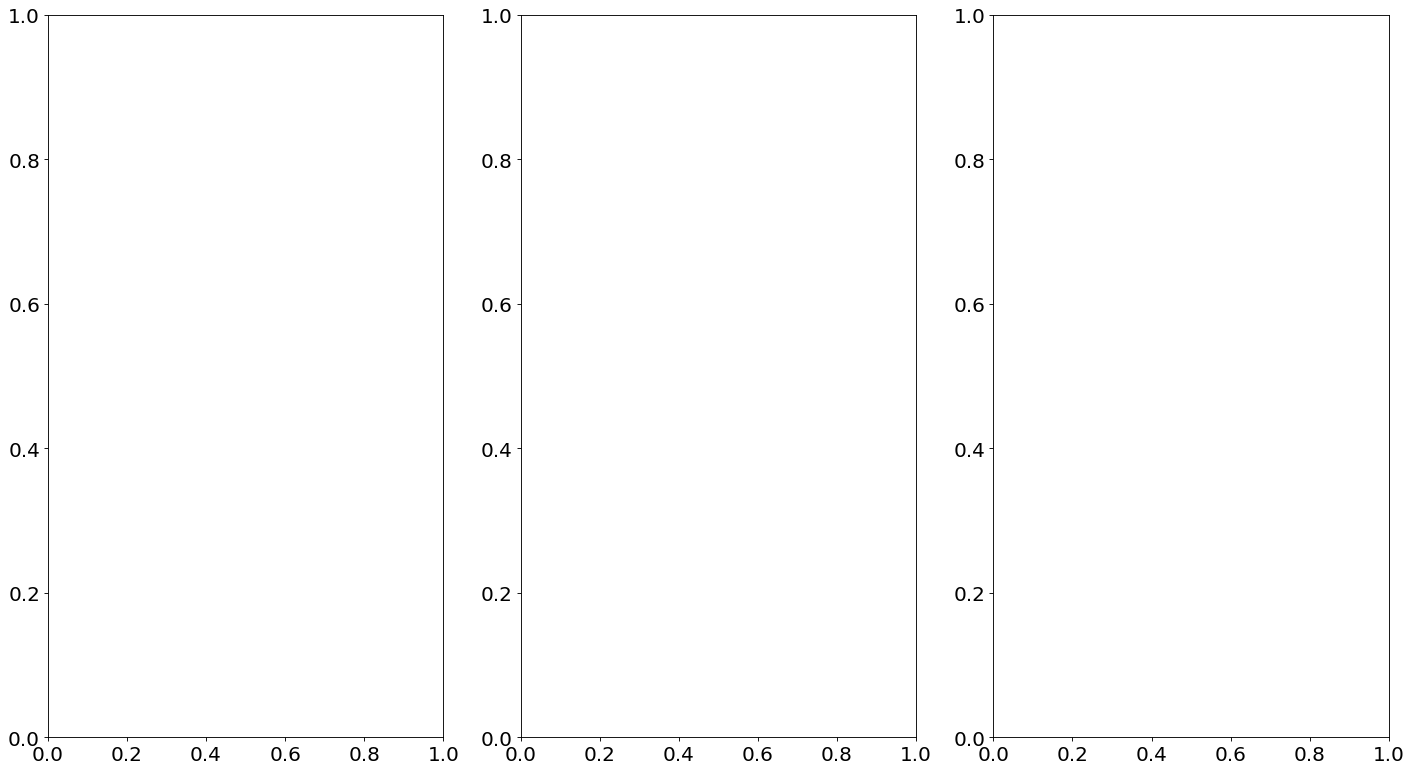

In [18]:
# Open a figure
fig, ax = plt.subplots(1,3, figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k');

# Switch to more spacious layout
fig.tight_layout()

# Plot the data
for idx in np.arange(0,len(timesteps)):
    
    ax[idx].plot(ds['mLayerVolFracIce'].isel(time=timesteps[idx])+\
                 ds['mLayerVolFracLiq'].isel(time=timesteps[idx]), \
                 ds['mLayerHeight'].isel(time=timesteps[idx]),\
                 color='blue', label='SUMMA');
    ax[idx].plot(ld[:,idx+1], ld[:,0], linestyle='None', marker='o', color='red', label='Observed');
    set_axes_and_text(idx,str(round(timesteps[idx]/60)) + ' hours') # timesteps [min] to [h], round() drops the decimal .0

# Save 
plt.savefig('img/lt6_mizuguchi1990.png',bbox_inches = "tight");